In [ ]:
from google.colab import files
files.upload()

Saving monets.zip to monets.zip
Saving photos.zip to photos.zip


{'monets.zip': b'PK\x03\x04\x14\x00\x00\x00\x00\x00\x15\x832S\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x07\x00 \x00monets/UT\r\x00\x07;\x94Ea;\x94EaF\x94Eaux\x0b\x00\x01\x04\xf5\x01\x00\x00\x04\x14\x00\x00\x00PK\x03\x04\x14\x00\x08\x00\x08\x00\x15\x832S\x00\x00\x00\x00\x00\x00\x00\x00\xd2\x00\x00\x00\x11\x00 \x00__MACOSX/._monetsUT\r\x00\x07;\x94Ea;\x94Ea{\x94Eaux\x0b\x00\x01\x04\xf5\x01\x00\x00\x04\x14\x00\x00\x00c`\x15cg`b`\xf0MLV\xf0\x0fV\x88P\x80\x02\x90\x18\x03\'\x10\x1b\x01\xf1\x02 \x06\xf1/1\x10\x05\x1cCB\x82\xa0L\x90\x8e\x15@\xac\x85\xa6\x84\x11!\xae\x92\x9c\x9f\xab\x97XP\x90\x93\xaa\x97\x9bZ\x92\x98\x92X\x92h\x15\x9f\xed\xeb\xe2Y\x92\x9a\x1bZ\x9cZ\x14\x92\x98^\xcc\xc0\x90T\x90\x93Y\\b`\xb0\x80\x03j\x00#\x92I\xc8\x80\x13\x00PK\x07\x08\x96\xde\x02\xa8m\x00\x00\x00\xd2\x00\x00\x00PK\x03\x04\x14\x00\x08\x00\x08\x00a\xa8\rQ\x00\x00\x00\x00\x00\x00\x00\x00\x962\x00\x00\x15\x00 \x00monets/1f22663e72.jpgUT\r\x00\x07\xf6+5_F\x94Ea8\x94Eaux\x0b\x00\x01\x04\xf5\x01\x00\x00\x04\x14

In [ ]:
!unzip "/content/monets.zip" -d "/content/monet/"
!unzip "/content/photos.zip" -d "/content/photo/"

Archive:  /content/monets.zip
   creating: /content/monet/monets/
  inflating: /content/monet/__MACOSX/._monets  
  inflating: /content/monet/monets/1f22663e72.jpg  
  inflating: /content/monet/__MACOSX/monets/._1f22663e72.jpg  
  inflating: /content/monet/monets/2acfbab228.jpg  
  inflating: /content/monet/__MACOSX/monets/._2acfbab228.jpg  
  inflating: /content/monet/monets/2cca56415e.jpg  
  inflating: /content/monet/__MACOSX/monets/._2cca56415e.jpg  
  inflating: /content/monet/monets/1a127acf4d.jpg  
  inflating: /content/monet/__MACOSX/monets/._1a127acf4d.jpg  
  inflating: /content/monet/monets/1f9667f2a7.jpg  
  inflating: /content/monet/__MACOSX/monets/._1f9667f2a7.jpg  
  inflating: /content/monet/monets/0bd913dbc7.jpg  
  inflating: /content/monet/__MACOSX/monets/._0bd913dbc7.jpg  
  inflating: /content/monet/monets/2c00f5147f.jpg  
  inflating: /content/monet/__MACOSX/monets/._2c00f5147f.jpg  
  inflating: /content/monet/monets/000c1e3bff.jpg  
  inflating: /content/monet/_

In [ ]:
# !pip install kaggle

In [ ]:
# !mkdir -p ~/.kaggle
# !mv kaggle.json ~/.kaggle/

In [ ]:
# !chmod 600 /root/.kaggle/kaggle.json

In [ ]:
# !kaggle competitions download -c gan-getting-started

In [ ]:
!pip install tensorflow-addons

     |████████████████████████████████| 1.1 MB 5.4 MB/s 


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from random import sample
import glob
from keras.preprocessing.image import load_img, img_to_array
import tensorflow as tf
from tensorflow_addons.layers import InstanceNormalization
from keras.layers import Layer, InputSpec, Concatenate
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Input, Conv2D, Flatten, Dense, UpSampling2D, Conv2DTranspose, Reshape, Lambda, Activation, BatchNormalization, LeakyReLU, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import Adam

In [ ]:
!pwd

/content


In [ ]:
monet_path_list=glob.glob("./monet/monets/*.jpg")
photo_path_list=glob.glob("./photo/photos/*.jpg")

monet_list=[]
photo_list=[]
img_shape = (128, 128, 3)

for monet_path in monet_path_list:
    temp_img = load_img(monet_path, grayscale=False, target_size=img_shape)
    temp_img_array = img_to_array(temp_img) / 255.0
    monet_list.append(temp_img_array) 

for photo_path in photo_path_list:
    temp_img = load_img(photo_path, grayscale=False, target_size=img_shape)
    temp_img_array = img_to_array(temp_img) / 255.0
    photo_list.append(temp_img_array)

monets=np.array(monet_list) 
photos=np.array(photo_list) 

In [ ]:
monets.shape

(10, 128, 128, 3)

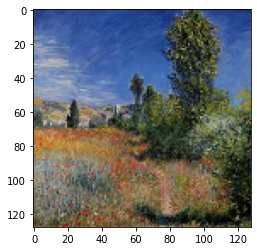

In [ ]:
plt.imshow(monets[0])

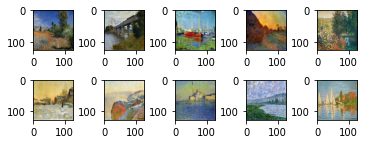

In [ ]:
rows, cols = 2, 5
fig, axs = plt.subplots(rows, cols, figsize = (5, 2))
for i in range(rows):
    for j in range(cols):
        axs[i][j].imshow(monets[cols*i + j])
fig.tight_layout(pad=0.5)
plt.show()

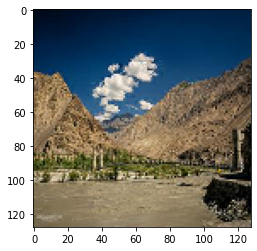

In [ ]:
plt.imshow(photos[0])

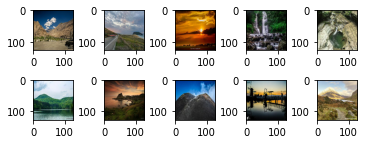

In [ ]:
rows, cols = 2, 5
fig, axs = plt.subplots(rows, cols, figsize = (5, 2))
for i in range(rows):
    for j in range(cols):
        axs[i][j].imshow(photos[cols*i + j])
fig.tight_layout(pad=0.5)
plt.show()

In [ ]:
class ReflectionPadding2D(Layer):
    def __init__(self, padding=(1, 1), **kwargs):
        self.padding = tuple(padding)
        self.input_spec = [InputSpec(ndim=4)]
        super(ReflectionPadding2D, self).__init__(**kwargs)

    def compute_output_shape(self, s):
        """ If you are using "channels_last" configuration"""
        return (s[0], s[1] + 2 * self.padding[0], s[2] + 2 * self.padding[1], s[3])

    def call(self, x, mask=None):
        w_pad,h_pad = self.padding
        return tf.pad(x, [[0,0], [h_pad,h_pad], [w_pad,w_pad], [0,0] ], 'REFLECT')

In [ ]:
G_n_filters=32
D_n_filters=32
lr=0.0002
lambda_val=30
lambda_reconstr=10
lambda_id=10

In [ ]:
def downsample(input, filters, kernel_size):
    x=Conv2D(filters, kernel_size, strides=2, padding="same")(input)
    x=InstanceNormalization(axis=-1, center=False, scale=False)(x)
    x=Activation("relu")(x)
    return x
def upsample(input, filters, kernel_size):
    x=Conv2DTranspose(filters, 3, 2, padding="same")(input)
    x=InstanceNormalization(axis=-1, center=False, scale=False)(x)
    x=Activation("relu")(x)
    return x
def residual(input, filters):
    shortcut=input
    x=ReflectionPadding2D(padding=(1, 1))(input)
    x=Conv2D(filters, 3, 1, padding="valid")(x)
    x=InstanceNormalization(axis=-1, center=False, scale=False)(x)
    x=Activation("relu")(x)

    x=ReflectionPadding2D(padding=(1, 1))(input)
    x=Conv2D(filters, 3, 1, padding="valid")(x)
    x=InstanceNormalization(axis=-1, center=False, scale=False)(x)
    x=Activation("relu")(x)

    return Concatenate()([shortcut, x])
def conv7s1(input, filters, final):
    x=ReflectionPadding2D(padding=(3,3))(input)
    x=Conv2D(filters, 7, 1, padding="valid")(x)
    if final:
        x=Activation("tanh")(x)
    else:
        x=InstanceNormalization(axis = -1, center = False, scale = False)(x)
        x=Activation("relu")(x)
    return x

G_input=Input((128, 128, 3))
x=G_input
x=conv7s1(x, G_n_filters, False)
x=downsample(x, G_n_filters*2, 3)
x=downsample(x, G_n_filters*4, 3)
x=residual(x, G_n_filters*4)
x=residual(x, G_n_filters*4)
x=residual(x, G_n_filters*4)
x=residual(x, G_n_filters*4)
x=residual(x, G_n_filters*4)
x=residual(x, G_n_filters*4)
x=residual(x, G_n_filters*4)
x=residual(x, G_n_filters*4)
x=residual(x, G_n_filters*4)
x=upsample(x, G_n_filters*2, 3)
x=upsample(x, G_n_filters, 3)
x=conv7s1(x, 3, True)
G_output=x
G=Model(G_input, G_output)

In [ ]:
G.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
reflection_padding2d (Reflectio (None, 134, 134, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 128, 128, 32) 4736        reflection_padding2d[0][0]       
__________________________________________________________________________________________________
instance_normalization (Instanc (None, 128, 128, 32) 0           conv2d[0][0]                     
______________________________________________________________________________________________

In [ ]:
def conv4(input, filters, strides=2, norm=True):
    x=Conv2D(filters, 4, strides, padding="same")(input)
    if norm:
        x=InstanceNormalization(axis=-1, center=False, scale=False)(x)
    x=LeakyReLU(0.2)(x)
    return x

D_input=Input((128, 128, 3))
x=conv4(D_input, D_n_filters, norm=False)
x=conv4(x, D_n_filters*2)
x=conv4(x, D_n_filters*4)
x=conv4(x, D_n_filters*8)

D_output=Conv2D(1, 4, 1, padding="same")(x)
D=Model(D_input, D_output)

In [ ]:
D.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 128, 128, 3)]     0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 64, 64, 32)        1568      
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 32, 32, 64)        32832     
_________________________________________________________________
instance_normalization_23 (I (None, 32, 32, 64)        0         
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 16, 16, 128)       1312

In [ ]:
D_A=Model(D_input, D_output)
D_B=Model(D_input, D_output)
D_A.compile(loss="mse", optimizer=Adam(lr, 0.5))
D_B.compile(loss="mse", optimizer=Adam(lr, 0.5))

In [ ]:
G_AB=Model(G_input, G_output)
G_BA=Model(G_input, G_output)

D_A.trainable=False
D_B.trainable=False

img_A=Input((128, 128, 3))
img_B=Input((128, 128, 3))
fake_A=G_BA(img_B)
fake_B=G_AB(img_A)

valid_A=D_A(fake_A)
valid_B=D_B(fake_B)
reconstr_A=G_BA(fake_B)
reconstr_B=G_AB(fake_A)
id_A=G_AB(img_A)
id_B=G_BA(img_B)

combined=Model(inputs=[img_A, img_B], outputs=[valid_A, valid_B, reconstr_A, reconstr_B, id_A, id_B])
combined.compile(loss=["mse", "mse", "mae", "mae", "mae", "mae"], \
                 loss_weights=[lambda_val, lambda_val, lambda_reconstr, lambda_reconstr, lambda_id, lambda_id], \
                 optimizer=Adam(lr, 0.5))

In [ ]:
batch_size=1
patch_size=(8,8,1)
valid=np.ones((batch_size,)+(patch_size))
fake=np.zeros((batch_size,)+(patch_size))
epochs=200
monets_len=monets.shape[0]
photos_len=photos.shape[0]
for epoch in range(epochs):
    G_loss_epoch=0
    for monet_i, photo_i in zip(sample(list(range(monets_len)), 10), \
                                sample(list(range(photos_len)), 10)):
        monet=monets[monet_i][np.newaxis, ...]
        photo=photos[photo_i][np.newaxis, ...]

        fake_A=G_BA(photo)
        fake_B=G_AB(monet)

        D_A_loss_real=D_A.train_on_batch(monet, valid)
        D_A_loss_fake=D_A.train_on_batch(fake_A, fake)
        D_A_loss=0.5*np.add(D_A_loss_real, D_A_loss_fake)

        D_B_loss_real=D_B.train_on_batch(photo, valid)
        D_B_loss_fake=D_B.train_on_batch(fake_B, fake)
        D_B_loss=0.5*np.add(D_B_loss_real, D_B_loss_fake)

        D_loss=0.5*np.add(D_A_loss, D_B_loss)

        G_loss=combined.train_on_batch([monet, photo], [valid, valid, monet, photo, monet, photo])
        G_loss=combined.train_on_batch([monet, photo], [valid, valid, monet, photo, monet, photo])
        G_loss_epoch+=G_loss[0]/monets_len
    print("{}/{}: D loss: {:.3f} {:.3f}(monet) {:.3f}(photo) G loss: {:.3f}"\
          .format(epoch+1, epochs, D_loss, D_A_loss, D_B_loss, G_loss_epoch))


1/200: D loss: 0.295 0.266(monet) 0.324(photo) G loss: 21.963
2/200: D loss: 0.311 0.267(monet) 0.355(photo) G loss: 21.348
3/200: D loss: 0.306 0.279(monet) 0.334(photo) G loss: 21.338
4/200: D loss: 0.290 0.271(monet) 0.308(photo) G loss: 20.528
5/200: D loss: 0.293 0.283(monet) 0.303(photo) G loss: 21.046
6/200: D loss: 0.294 0.284(monet) 0.304(photo) G loss: 20.744
7/200: D loss: 0.293 0.281(monet) 0.306(photo) G loss: 20.359
8/200: D loss: 0.289 0.284(monet) 0.293(photo) G loss: 20.679
9/200: D loss: 0.295 0.289(monet) 0.300(photo) G loss: 20.315
10/200: D loss: 0.287 0.287(monet) 0.288(photo) G loss: 20.035
11/200: D loss: 0.294 0.272(monet) 0.316(photo) G loss: 20.496
12/200: D loss: 0.289 0.275(monet) 0.304(photo) G loss: 20.073
13/200: D loss: 0.292 0.289(monet) 0.295(photo) G loss: 19.861
14/200: D loss: 0.308 0.282(monet) 0.333(photo) G loss: 19.799
15/200: D loss: 0.294 0.289(monet) 0.299(photo) G loss: 19.884
16/200: D loss: 0.293 0.283(monet) 0.303(photo) G loss: 19.634
1

In [ ]:
plt.imshow(G_BA.predict(G_AB.predict(photos[0][np.newaxis, ...]))[0, ...])

NameError: ignored

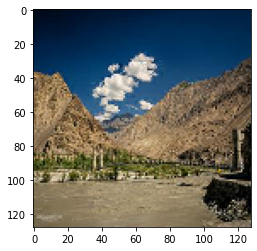

In [ ]:
plt.imshow(photos[0])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


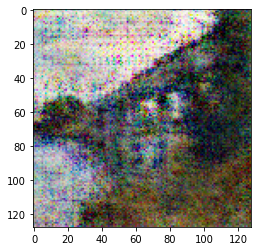

In [ ]:
plt.imshow(G_BA.predict(monets[1][np.newaxis, ...])[0, ...])

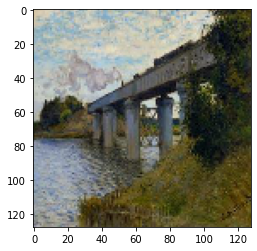

In [ ]:
plt.imshow(monets[1])